In [1]:
# PREPARE SPARK FOR USE

In [2]:
# Install pyspark and pyspark sql
!pip install pyspark
!pip install pyspark[sql]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
# set environment variables
!PYSPARK_HADOOP_VERSION=3.2 pip install pyspark
!PYSPARK_RELEASE_MIRROR=http://mirror.apache-kr.org PYSPARK_HADOOP_VERSION=2.7
!PYSPARK_HADOOP_VERSION=3.2 pip install pyspark -v

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Using pip 23.0.1 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
from pyspark.sql.functions import *

In [5]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.master("local[*]").getOrCreate()

In [ ]:
# create credentials, create s3 session with boto3

In [ ]:
# Fill your aws credential information here
credentials = {
    'region_name': 'us-east-1',
    'aws_access_key_id': 'xxxx',
    'aws_secret_access_key': 'xxxx',
    'aws_session_token': 'xxxx'
}

In [ ]:
!pip install boto3
import boto3

session = boto3.session.Session(**credentials)
s3 = session.client('s3')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.6/135.6 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.6/79.6 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 32.2 MB/s eta 0:00:00


In [ ]:
roads_file = s3.get_object(Bucket='bigdata-incident-project', Key='data/USA_Tennessee.geojson')
print(roads_file)

{'ResponseMetadata': {'RequestId': '2150SMFCET51TFP2', 'HostId': '0tHhwVcPwh5D+TdvJNJq9Kj1r4SYzVMbLbhdhrX3MQKpGItvbKDU2flWLtNfPfmsdLG3Y3ZdjrU=', 'HTTPStatusCode': 200, 'HTTPHeaders': {'x-amz-id-2': '0tHhwVcPwh5D+TdvJNJq9Kj1r4SYzVMbLbhdhrX3MQKpGItvbKDU2flWLtNfPfmsdLG3Y3ZdjrU=', 'x-amz-request-id': '2150SMFCET51TFP2', 'date': 'Wed, 26 Apr 2023 00:52:27 GMT', 'last-modified': 'Mon, 17 Apr 2023 18:45:07 GMT', 'etag': '"9218db489de97f7e88e2e6cc52fae478-11"', 'x-amz-server-side-encryption': 'AES256', 'accept-ranges': 'bytes', 'content-type': 'application/x-www-form-urlencoded; charset=utf-8', 'server': 'AmazonS3', 'content-length': '176882310'}, 'RetryAttempts': 0}, 'AcceptRanges': 'bytes', 'LastModified': datetime.datetime(2023, 4, 17, 18, 45, 7, tzinfo=tzutc()), 'ContentLength': 176882310, 'ETag': '"9218db489de97f7e88e2e6cc52fae478-11"', 'ContentType': 'application/x-www-form-urlencoded; charset=utf-8', 'ServerSideEncryption': 'AES256', 'Metadata': {}, 'Body': <botocore.response.StreamingB

In [ ]:
# DATA IN THE S3 BUCKET
# =====================
# data/USA_Tennessee.geojson
# data/nfd_incidents_xd_seg.parquet
# data/weather_tn.parquet/ **this is a folder 
# data/traffic.parquet/ **this is a folder

In [ ]:
# Read the road geometery

In [ ]:
!pip install geopandas pandas pyarrow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 72.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 57.5 MB/s eta 0:00:00


In [ ]:
import geopandas as gpd

In [ ]:
roads=gpd.read_file('USA_Tennessee.geojson')

In [ ]:
roads.head(2)

,OID,XDSegID,PreviousXD,NextXDSegI,FRC,ToExport,Miles,Lanes,RoadNumber,RoadName,...,PrimaryTmc,RoadList,StartLat,StartLong,EndLat,EndLong,Bearing,XDGroup,ShapeSRID,geometry
0,7229828,136894283,441153578.0,441154707.0,4,NaN,0.475558,1.0225,,KNOB CREEK RD,...,,KNOB CREEK RD,36.35334,-82.42849,36.34747,-82.42857,E,765512,4326,"LINESTRING (-82.42849 36.35334, -82.42794 36.3..."
1,7229829,136894316,NaN,NaN,5,NaN,0.047735,1.1470,,16TH ST SW,...,,16TH ST SW|16TH ST,35.95902,-83.93125,35.95965,-83.93160,N,765513,4326,"LINESTRING (-83.93128 35.95901, -83.93158 35.9..."


In [ ]:
roads.columns

Index(['OID', 'XDSegID', 'PreviousXD', 'NextXDSegI', 'FRC', 'ToExport',
       'Miles', 'Lanes', 'RoadNumber', 'RoadName', 'Country', 'State',
       'County', 'PostalCode', 'SlipRoad', 'SpecialRoa', 'IsConnecto',
       'AllTmcList', 'PrimaryTmc', 'RoadList', 'StartLat', 'StartLong',
       'EndLat', 'EndLong', 'Bearing', 'XDGroup', 'ShapeSRID', 'geometry'],
      dtype='object')

In [ ]:
#FRC describes the road kind. 1 are major interstates and 5 are very small roads. See https://docs.inrix.com/reference/glossary/

In [ ]:
roads=roads[roads.County=='DAVIDSON']

<Axes: >

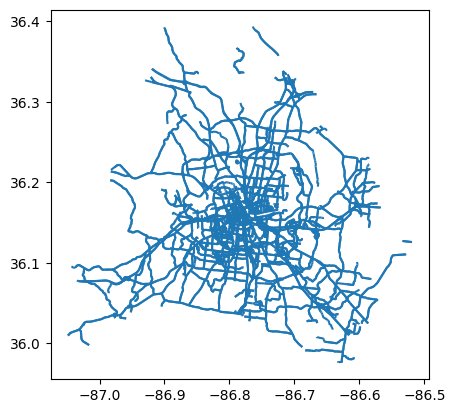

In [ ]:
roads.plot()

In [ ]:
roads.geometry # these are the line strings describing the road.

9033     LINESTRING (-86.75077 36.17116, -86.75076 36.1...
9045     LINESTRING (-86.77000 36.11989, -86.77046 36.1...
9051     LINESTRING (-86.77935 36.03619, -86.77935 36.0...
9055     LINESTRING (-86.75020 36.15446, -86.75019 36.1...
9056     LINESTRING (-86.71250 36.32843, -86.71272 36.3...
                               ...                        
94650    LINESTRING (-86.76221 36.16760, -86.76275 36.1...
94789    LINESTRING (-86.77707 36.12617, -86.77705 36.1...
94794    LINESTRING (-86.84079 36.15400, -86.84201 36.1...
94893    LINESTRING (-86.74435 36.14281, -86.74437 36.1...
95025    LINESTRING (-86.70474 36.12184, -86.70476 36.1...
Name: geometry, Length: 8641, dtype: geometry

In [ ]:
# read parquet data

In [6]:
incident_data = spark.read.parquet('/content/nfd_incidents_xd_seg.parquet').withColumn("date", to_date('time_utc')).withColumn("hour", hour("time_utc"))
incident_data.show()

+--------------------+-----------+------------+-------------+--------------------+--------------------+-----------------+-----------+--------------+--------------------+-----------+--------------------+-------------+----------+----+
|         ID_Original|   latitude|   longitude|emdCardNumber|            time_utc|          time_local|response_time_sec|day_of_week|weekend_or_not|            geometry|Incident_ID|         Dist_to_Seg|      XDSegID|      date|hour|
+--------------------+-----------+------------+-------------+--------------------+--------------------+-----------------+-----------+--------------+--------------------+-----------+--------------------+-------------+----------+----+
|ObjectId(59d3a819...|36.03722849|-86.78324314|         29B5|2017-01-01 07:59:...|2017-01-01 01:59:...|            268.0|          6|             1|POINT (-86.783243...|         10|  13.550370382347305|1.524393684E9|2017-01-01|   7|
|ObjectId(59d3a819...|36.03741402|-86.78657189|        29D2P| 2017-0

In [8]:
# Nashville Weather Stations: KBNA, KJWN, 723271-99999
weather_data = spark.read.parquet('/content/weather/').select('*').where("station_id == \'KBNA\' OR station_id == \'KJWN\'")
weather_data.show()


+----------+-------------------+----------------------+-----+-------------+---------------+-------------------+----------------+------+--------------------+-------------------+
|     xd_id| measurement_tstamp|measurement_tstamp_str|speed|average_speed|reference_speed|travel_time_seconds|confidence_score|cvalue|          congestion| extreme_congestion|
+----------+-------------------+----------------------+-----+-------------+---------------+-------------------+----------------+------+--------------------+-------------------+
|1524425526|2020-01-30 00:00:00|   2020-01-30 00:00:00| 31.0|         31.0|           40.0|              30.74|            20.0|  null|               0.225|                0.0|
| 441427676|2020-01-05 11:55:00|   2020-01-05 11:55:00| 54.2|         57.0|           57.0|               31.8|            30.0|100.00| 0.04912280701754381|0.04912280701754381|
|1524600285|2020-01-30 02:45:00|   2020-01-30 02:45:00| 20.0|         null|           20.0|             110.29|    

In [9]:
traffic_data = spark.read.parquet('/content/traffic/').withColumn("date", to_date('measurement_tstamp')).withColumn("hour", hour("measurement_tstamp"))
traffic_data.show()

+----------+-------------------+----------------------+-----+-------------+---------------+-------------------+----------------+------+--------------------+-------------------+----------+----+
|     xd_id| measurement_tstamp|measurement_tstamp_str|speed|average_speed|reference_speed|travel_time_seconds|confidence_score|cvalue|          congestion| extreme_congestion|      date|hour|
+----------+-------------------+----------------------+-----+-------------+---------------+-------------------+----------------+------+--------------------+-------------------+----------+----+
|1524425526|2020-01-30 00:00:00|   2020-01-30 00:00:00| 31.0|         31.0|           40.0|              30.74|            20.0|  null|               0.225|                0.0|2020-01-30|   0|
| 441427676|2020-01-05 11:55:00|   2020-01-05 11:55:00| 54.2|         57.0|           57.0|               31.8|            30.0|100.00| 0.04912280701754381|0.04912280701754381|2020-01-05|  11|
|1524600285|2020-01-30 02:45:00|   

In [ ]:
# This method is less precise but faster. It only gets the first traffic data of the hour (although we could maybe get it closer) but runs in 4 secs
# this method requires creating additional columns for date and hour, however creation is fast


In [11]:
incidents_plus_traffic = incident_data.join(traffic_data, [incident_data.date == traffic_data.date, incident_data.hour == traffic_data.hour, incident_data.XDSegID == traffic_data.xd_id], 'left').select('*').where('speed > 0')

incidents_plus_traffic.show()

+--------------------+-----------+------------+-------------+--------------------+--------------------+-----------------+-----------+--------------+--------------------+-----------+------------------+-------------+----------+----+----------+-------------------+----------------------+-----+-------------+---------------+-------------------+----------------+------+----------+------------------+----------+----+
|         ID_Original|   latitude|   longitude|emdCardNumber|            time_utc|          time_local|response_time_sec|day_of_week|weekend_or_not|            geometry|Incident_ID|       Dist_to_Seg|      XDSegID|      date|hour|     xd_id| measurement_tstamp|measurement_tstamp_str|speed|average_speed|reference_speed|travel_time_seconds|confidence_score|cvalue|congestion|extreme_congestion|      date|hour|
+--------------------+-----------+------------+-------------+--------------------+--------------------+-----------------+-----------+--------------+--------------------+---------

In [ ]:
# This is the most precise, joins to exact closest traffic data. It took about 2:45 to run.

In [16]:
more_precise_join = incident_data.join(traffic_data, [unix_timestamp(traffic_data.measurement_tstamp) - unix_timestamp(incident_data.time_utc) <= 300, incident_data.XDSegID == traffic_data.xd_id], 'left').select('*').where('speed > 0')

more_precise_join.show()

+--------------------+-----------+------------+-------------+--------------------+--------------------+-----------------+-----------+--------------+--------------------+-----------+-------------------+-------------+----------+----+----------+-------------------+----------------------+-----+-------------+---------------+-------------------+----------------+------+----------+--------------------+----------+----+
|         ID_Original|   latitude|   longitude|emdCardNumber|            time_utc|          time_local|response_time_sec|day_of_week|weekend_or_not|            geometry|Incident_ID|        Dist_to_Seg|      XDSegID|      date|hour|     xd_id| measurement_tstamp|measurement_tstamp_str|speed|average_speed|reference_speed|travel_time_seconds|confidence_score|cvalue|congestion|  extreme_congestion|      date|hour|
+--------------------+-----------+------------+-------------+--------------------+--------------------+-----------------+-----------+--------------+--------------------+---

In [ ]:
# The first join method makes the most sense with weather data because weather data is only accurate within an hour anyways.
# The second join method may be necessary if we want accurate traffic data because it is more precise. We can't compare minutes with
# the first method without adding more code that would probably slow it down quite a bit anyways. 